In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.interpolate import CubicHermiteSpline

In [2]:
static_matrix = np.array([
    [1, 0, 0, 0],
    [0, 0, 1, 0],
    [-3, 3, -2, -1],
    [2, -2, 1, 1],
])

In [3]:
dict_dots = {
    "A": [1, 1],
    "B": [3, 1],
    "v": [0, 1],
    "w": [0, -1],
}

In [4]:
x, y = [], []

for v in dict_dots.values():
    x += [v[0]]
    y += [v[1]]

In [5]:
x

[1, 3, 0, 0]

In [6]:
y

[1, 1, 1, -1]

In [7]:
x, y = np.array(x), np.array(y)

In [8]:
x_res = static_matrix @ x
x_res

array([ 1,  0,  6, -4])

In [9]:
y_res = static_matrix @ y
y_res

array([ 1,  1, -1,  0])

In [10]:
coef_a1 = {}
coef_a2 = {}
for i, coords in enumerate(zip(x_res, y_res)):
    x_, y_ = coords
    coef_a1[sp.symbols(f"a1{i}")] = x_
    coef_a2[sp.symbols(f"a2{i}")] = y_

In [11]:
coef_a1

{a10: np.int64(1), a11: np.int64(0), a12: np.int64(6), a13: np.int64(-4)}

In [12]:
coef_a2

{a20: np.int64(1), a21: np.int64(1), a22: np.int64(-1), a23: np.int64(0)}

In [13]:
u = sp.symbols("u")
u

u

In [14]:
p = []
p1 = 0
p2 = 0

coef_a1_ = list(coef_a1.keys())
coef_a2_ = list(coef_a2.keys())
for i in range(4):
    p1 += coef_a1[coef_a1_[i]] * u ** i
    p2 += coef_a2[coef_a2_[i]] * u ** i

p = [p1, p2]
p

[-4*u**3 + 6*u**2 + 1, -u**2 + u + 1]

In [15]:
A = (
    p[0].subs(u, 0),
    p[1].subs(u, 0)
)
A

(1, 1)

In [16]:
B = (
    p[0].diff(u).subs(u, 0),
    p[1].diff(u).subs(u, 0)
)
B

(0, 1)

In [17]:
C = (
    p[0].subs(u, 1),
    p[1].subs(u, 1)
)
C

(3, 1)

In [18]:
D = (
    p[0].diff(u).subs(u, 1),
    p[1].diff(u).subs(u, 1)
)
D

(0, -1)

In [19]:
u = np.linspace(0, 1, 1000)
x_inter = x_res[0] + x_res[1] * u + x_res[2] * u ** 2 + x_res[3] * u ** 3
y_inter = y_res[0] + y_res[1] * u + y_res[2] * u ** 2 + y_res[3] * u ** 3

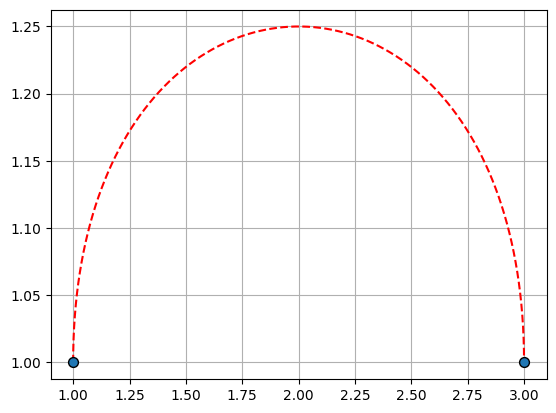

In [20]:
plt.scatter(x[:2], y[:2], s=50, ec="black", zorder=3)
plt.plot(x_inter, y_inter, "r--")
# plt.xlim((-1, 3))
# plt.ylim((-1, 5))
plt.grid()
plt.show()

In [21]:
dict_dots2 = {
    "A": [3, 1],
    "B": [7, 1],
    "v": [0, -1],
    "w": [1, 1],
}

In [22]:
x2, y2 = [], []

for v in dict_dots2.values():
    x2 += [v[0]]
    y2 += [v[1]]

In [23]:
x2, y2 = np.array(x2), np.array(y2)

In [24]:
x_res2 = static_matrix @ x2
x_res2

array([ 3,  0, 11, -7])

In [25]:
y_res2 = static_matrix @ y2
y_res2

array([ 1, -1,  1,  0])

In [26]:
coef2_a1 = {}
coef2_a2 = {}
for i, coords in enumerate(zip(x_res2, y_res2)):
    x_, y_ = coords
    coef2_a1[sp.symbols(f"a1{i}")] = x_
    coef2_a2[sp.symbols(f"a2{i}")] = y_

In [27]:
coef2_a1

{a10: np.int64(3), a11: np.int64(0), a12: np.int64(11), a13: np.int64(-7)}

In [28]:
coef2_a2

{a20: np.int64(1), a21: np.int64(-1), a22: np.int64(1), a23: np.int64(0)}

In [29]:
u = sp.symbols("u")
u

u

In [30]:
p2 = []
p12 = 0
p22 = 0

coef2_a1_ = list(coef2_a1.keys())
coef2_a2_ = list(coef2_a2.keys())
for i in range(4):
    p12 += coef2_a1[coef2_a1_[i]] * u ** i
    p22 += coef2_a2[coef2_a2_[i]] * u ** i

p2 = [p12, p22]
p2

[-7*u**3 + 11*u**2 + 3, u**2 - u + 1]

In [31]:
u = np.linspace(0, 1, 1000)
x_inter2 = x_res2[0] + x_res2[1] * u + x_res2[2] * u ** 2 + x_res2[3] * u ** 3
y_inter2 = y_res2[0] + y_res2[1] * u + y_res2[2] * u ** 2 + y_res2[3] * u ** 3

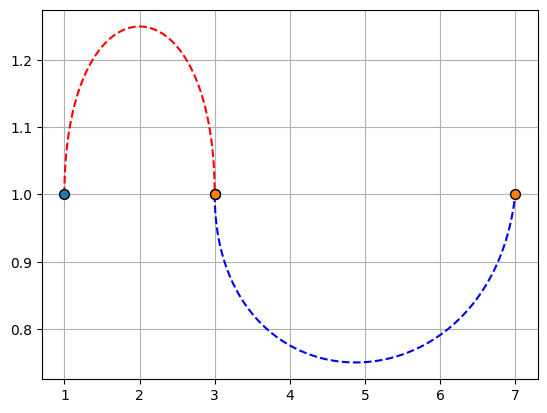

In [32]:
plt.scatter(x[:2], y[:2], s=50, ec="black", zorder=3)
plt.plot(x_inter, y_inter, "r--")
plt.scatter(x2[:2], y2[:2], s=50, ec="black", zorder=3)
plt.plot(x_inter2, y_inter2, "b--")
# plt.xlim((-1, 3))
# plt.ylim((-1, 5))
plt.grid()
plt.show()

In [33]:
import pandas as pd

df = pd.read_csv("nan_data.csv")
df

,x1,x2,x3,y
0,42.0,92.0,28.0,1128
1,32.0,9.0,67.0,1301
2,46.0,59.0,94.0,1350
3,96.0,85.0,40.0,1315
4,10.0,20.0,1.0,1011
...,...,...,...,...
95,16.0,65.0,52.0,1127
96,78.0,45.0,NaN,1268
97,4.0,87.0,93.0,1207
98,63.0,89.0,23.0,1184


In [34]:
df.isnull().sum()

,0
x1,3
x2,4
x3,3
y,0


In [35]:
def interpolate_nan_hermite(column):
    mask = ~column.isna()

    x = np.arange(len(column))[mask]
    y = column[mask].values
    dy = df["y"].to_numpy()[mask]
    cs = CubicHermiteSpline(x, y, dy)
    x_all = np.arange(len(column))
    interpolated = cs(x_all)
    result = column.copy()
    result[~mask] = interpolated[~mask]
    return result

print(df.isna().sum())

for col in ["x1", "x2", "x3"]:
    if df[col].isna().any():
        df[col] = interpolate_nan_hermite(df[col])

print(df.isna().sum())

x1    3
x2    4
x3    3
y     0
dtype: int64
x1    0
x2    0
x3    0
y     0
dtype: int64


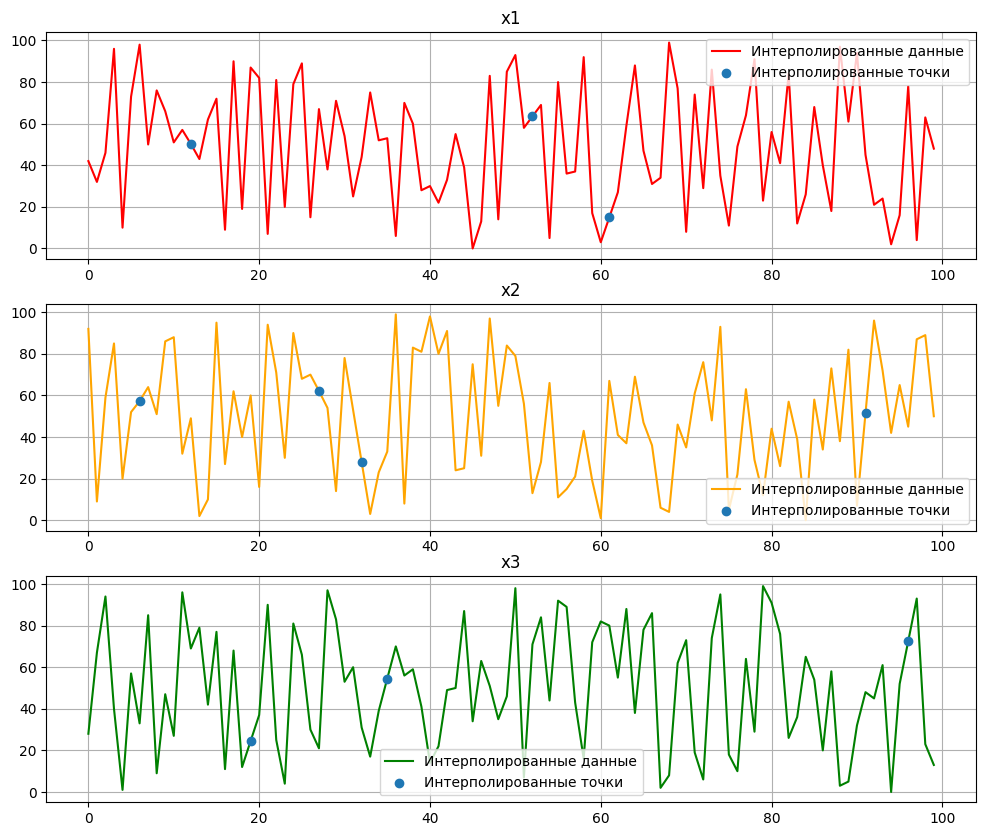

In [36]:
df = pd.read_csv("nan_data.csv")

def interpolate_nan_hermite(column):
    mask = ~column.isna()

    x = np.arange(len(column))[mask]
    y = column[mask].values
    # dy = df["y"].to_numpy()[mask]
    dy = np.gradient(x, y)
    cs = CubicHermiteSpline(x, y, dy)
    x_all = np.arange(len(column))
    interpolated = cs(x_all)
    result = column.copy()
    result[~mask] = interpolated[~mask]
    return result, mask

fig, ax = plt.subplots(3, 1, figsize=(12, 10))

colors = ["red", "orange", "green"]

for i, col in enumerate(["x1", "x2", "x3"]):
    if df[col].isna().any():
        df[col], mask = interpolate_nan_hermite(df[col])

        ax[i].plot(np.arange(len(df)), df[col], color=colors[i], label="Интерполированные данные")
        ax[i].scatter(np.arange(len(df))[~mask], df[col][~mask], label="Интерполированные точки", zorder=3)

        ax[i].set_title(f"{col}")
        ax[i].legend()
        ax[i].grid()

plt.show()

In [37]:
df2 = pd.read_csv("nan_data.csv")
data = df.iloc
data2 = df2.iloc
for i in range(len(df2)):
    if np.isnan(data2[i]).any():
        print(data2[i].name, data2[i].values, data[i].name, data[i].values)

6 [  98.   nan   33. 1380.] 6 [  98.           57.25999781   33.         1380.        ]
12 [  nan   49.   69. 1457.] 12 [  50.27225877   49.           69.         1457.        ]
19 [  87.   60.   nan 1429.] 19 [  87.           60.           24.52462767 1429.        ]
27 [  67.   nan   21. 1231.] 27 [  67.           62.17142857   21.         1231.        ]
32 [  44.   nan   31. 1139.] 32 [  44.       27.9625   31.     1139.    ]
35 [  53.   33.   nan 1163.] 35 [  53.           33.           54.55918748 1163.        ]
52 [  nan   13.   71. 1196.] 52 [  63.51386245   13.           71.         1196.        ]
61 [  nan   67.   80. 1357.] 61 [  14.91272321   67.           80.         1357.        ]
91 [  45.   nan   48. 1214.] 91 [  45.           51.46505037   48.         1214.        ]
96 [  78.   45.   nan 1268.] 96 [  78.           45.           72.47445254 1268.        ]
